---
---
## Trabajo Práctico 5 - Estimación de Intervalos
---
---

Considerar $n=32$ lanzamientos de una moneda cargada con probabilidad $p$ de salir cara. El numero de caras $X$ es una variable aleatoria con distribucion binomial $X \sim B(n, p)$. Considerar
un tanda de lanzamientos en el que salen $k$ caras. El estimador del
parametro $p$ es $\hat{p} = \frac{k}{n}$. El intervalo de confianza estándar de $p$ con un nivel de confianza del $95\%$ es $\hat{p} \pm 1.96\sqrt{\hat{p}(1 − \hat{p})/n}$, donde $q = 1.96$ es el cuantil normal estandar para un $95\%$ CL.

  * Simular 10.000 tandas de lanzamientos asumiendo $p = 0.2$.

  * Verificar para cada tanda si el intervalo incluye o no a $p = 0.2$.

  * Estimar la cobertura del intervalo.

  * Decidir si el intervalo es exacto y comparar la cobertura con respecto al nivel de confianza.

  * Barrer $p$ en el intervalo [0,1] en pasos de $0.01$, graficar y ver si hay valores de $p$ para los cuáles la cobertura es particularmente mala.

  * Estimar la cobertura de un nuevo intervalo $t \pm 1.96 \sqrt{t(1 − t)/n}$ con $t = (k + 2)/(n + 4)$, equivalente a “agregar dos  aciertos y dos fracasos”.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Parámetros del problema
n = 32
p = 0.2
num_simulations = 10000
confidence_level = 0.95
q = 1.96  # Cuantil para el 95% de confianza

In [44]:
# Simular 10,000 tandas de lanzamientos

np.random.seed(42)  # Para reproducibilidad
k_values = np.random.binomial(n, p, num_simulations)
p_hat = k_values / n

In [45]:
# Verificar si el intervalo incluye a p = 0.2

error = q * np.sqrt(p_hat * (1 - p_hat) / n)
p_1 = p_hat - error
p_2 = p_hat + error

nhits = np.logical_and(p_1 <= p, p <= p_2)

In [ ]:
# Estimar la cobertura del intervalo

coverage = np.mean(nhits)
print(f'Cobertura del intervalo estándar: {coverage*100:.2f}%')

Cobertura del intervalo estándar: 88.82%


In [ ]:
# Decidir si el intervalo es exacto y comparar la cobertura con respecto al nivel de confianza

from scipy.stats import norm

nsigma = 1.96

confidence_level = norm.sf(-nsigma) - norm.sf(nsigma)
print(f"Confidence level: {confidence_level*100:.2f}%")

Confidence level: 95.00%


La cobertura **no** coincide con el nivel de confianza. Por lo tanto, el intervalo de confianza de p no es **exacto**. 

In [81]:
def Cobertura(p, estimador):

    # Parámetros del problema
    n = 32
    num_simulations = 10000
    q = 1.96  # Cuantil para el 95% de confianza

    np.random.seed(42)  # Para reproducibilidad
    k_values = np.random.binomial(n, p, num_simulations)

    error = q * np.sqrt(estimador(k_values) * (1 - estimador(k_values)) / n)
    p_1 = estimador(k_values) - error
    p_2 = estimador(k_values) + error

    nhits = np.logical_and(p_1 <= p, p <= p_2)
    coverage = np.mean(nhits)

    return coverage

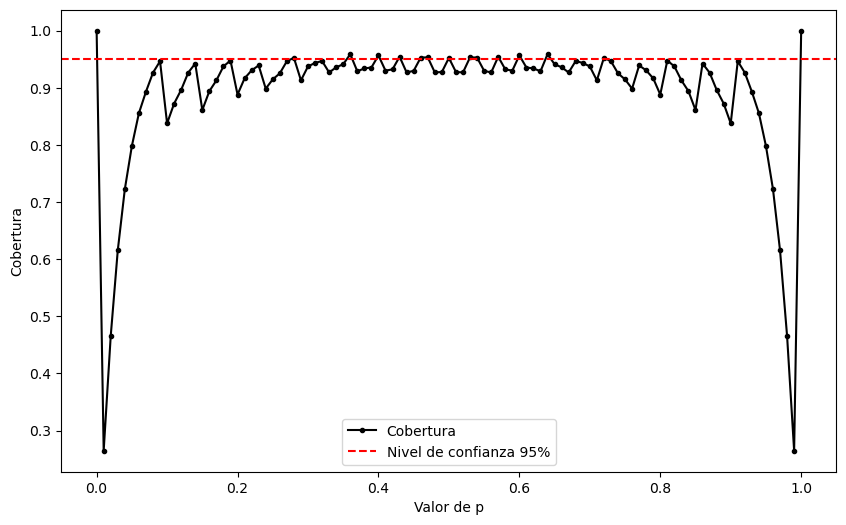

In [91]:
# Barrer p en el intervalo [0, 1] en pasos de 0.01 y graficar la cobertura

def p_hat(k_values):
    return k_values / n

p_values = np.arange(0, 1.01, 0.01)
coverages = []

for p in p_values:
    cover = Cobertura(p, p_hat)
    coverages.append(np.mean(cover))

plt.figure(figsize=(10, 6))
plt.plot(p_values, coverages, 'k.-', label='Cobertura')
plt.axhline(y=confidence_level, color='r', linestyle='--', label='Nivel de confianza 95%')
plt.xlabel('Valor de p')
plt.ylabel('Cobertura')
plt.legend()
plt.show()

La cobertura parece oscilar al rededor del CL, alejandose más de este cuando el valor de p es cercano a los extremos, es decir, a 0 o 1.

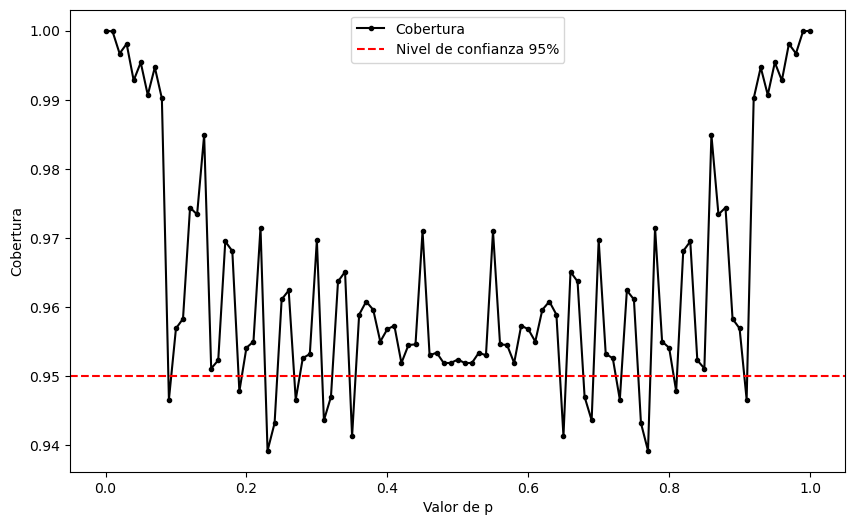

In [92]:
# Estimar la cobertura de un nuevo intervalo $t \pm 1.96 \sqrt{t(1 − t)/n}$ con 
# $t = (k + 1)/(n + 2)$, equivalente a “agregar un acierto y 1 fracaso”.

def t(k_values):
    return (k_values + 1) / (n + 2)

p_values = np.arange(0, 1.01, 0.01)
coverages = []

for p in p_values:
    cover = Cobertura(p, t)
    coverages.append(np.mean(cover))

plt.figure(figsize=(10, 6))
plt.plot(p_values, coverages, 'k.-', label='Cobertura')
plt.axhline(y=confidence_level, color='r', linestyle='--', label='Nivel de confianza 95%')
plt.xlabel('Valor de p')
plt.ylabel('Cobertura')
plt.legend()
plt.show()

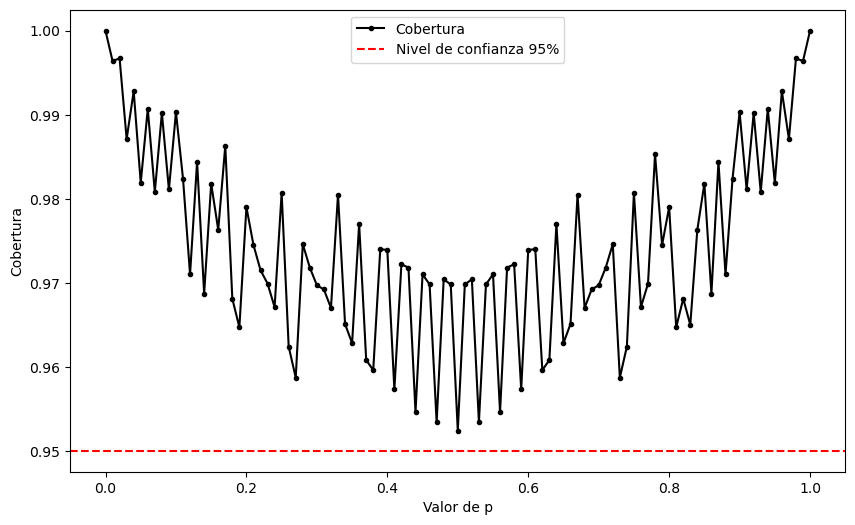

In [93]:
# Estimar la cobertura de un nuevo intervalo $t \pm 1.96 \sqrt{t(1 − t)/n}$ con 
# $t = (k + 2)/(n + 4)$, equivalente a “agregar dos aciertos y dos fracasos”.

def t2(k_values):
    return (k_values + 2) / (n + 4)

p_values = np.arange(0, 1.01, 0.01)
coverages = []

for p in p_values:
    cover = Cobertura(p, t2)
    coverages.append(np.mean(cover))

plt.figure(figsize=(10, 6))
plt.plot(p_values, coverages, 'k.-', label='Cobertura')
plt.axhline(y=confidence_level, color='r', linestyle='--', label='Nivel de confianza 95%')
plt.xlabel('Valor de p')
plt.ylabel('Cobertura')
plt.legend()
plt.show()

Conforme modificamos el estimador de p agregando aciertos y fracasos, el nivel de cobertura mejora. Particularmente, los valores de p cercanos a los extremos ahora corresponden a los valores con mejor cobertura. Por lo tanto, para eventos raros (p cercana a 0 o 1), conviene usar t, que corresponde a un estimador de Bayes.